# test

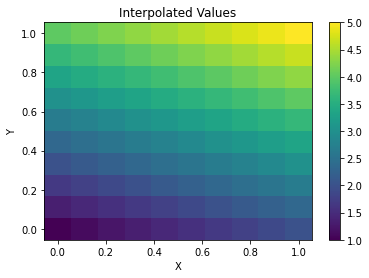

In [30]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Define the triangular grid
points = np.array([[0, 0], [1, 0], [0.5, 0.5], [0, 1], [1, 1]])
triangles = np.array([[0, 1, 2], [0, 2, 3], [2, 1, 4], [2, 4, 3]])
values = np.array([1, 2, 3, 4, 5])

# Define the regular grid
nx, ny = (10, 10)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
points_regular = np.vstack((xv.flatten(), yv.flatten())).T

# Perform bilinear interpolation to obtain values on the regular grid
values_regular = griddata(points, values, points_regular, method='linear')

# Reshape the interpolated values to match the shape of the regular grid
z = values_regular.reshape((ny, nx))

# Create a pcolormesh plot of the regular grid with the interpolated values
fig, ax = plt.subplots()
im = ax.pcolormesh(xv, yv, z, shading='nearest', cmap='viridis')

# Add a colorbar and axis labels
fig.colorbar(im)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Interpolated Values')
plt.show()

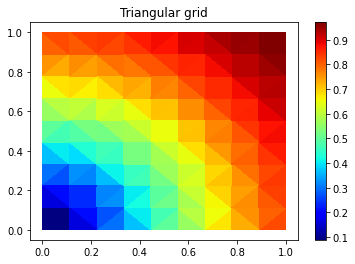

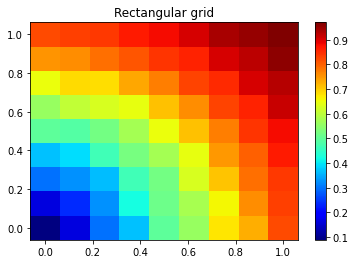

In [12]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Define the regular triangular grid
nxr, nyr = (10, 10)
x, y = np.meshgrid(np.linspace(0, 1, nxr), np.linspace(0, 1, nyr))
x, y = x.flatten(), y.flatten()
z = np.sin(np.sqrt(x**2 + y**2))
points = np.vstack((x, y, z)).T
tri = Delaunay(points[:, :2])

# Define the regular rectangular grid
nxx, nyy = (9, 9)
xx, yy = np.meshgrid(np.linspace(0, 1, nxx), np.linspace(0, 1, nyy))
points_regular = np.vstack((xx.flatten(), yy.flatten())).T

# Convert to rectangular grid using Delaunay triangulation
# this line tells u which  which triangle each point in the rectangular grid
# is located in using the find_simplex() method of the tri object.
#the average of the z values of the three vertices of the triangle is calculated using the average()
tri_indices = tri.find_simplex(points_regular)
values_regular = np.zeros(nxx*nyy)
for i in range(nxx*nyy):
    if tri_indices[i] != -1:
        values_regular[i] = np.average(points[tri.simplices[tri_indices[i]]][:,2])
    else:
        values_regular[i] = np.nan

# Plot the result
plt.tripcolor(points[:,0], points[:,1], tri.simplices, points[:,2], cmap='jet')
plt.colorbar()
plt.title('Triangular grid')
plt.show()

plt.pcolormesh(xx, yy, values_regular.reshape(nyy, nxx), cmap='jet')
plt.colorbar()
plt.title('Rectangular grid')
plt.show()

In [42]:
len(tri_indices)

324

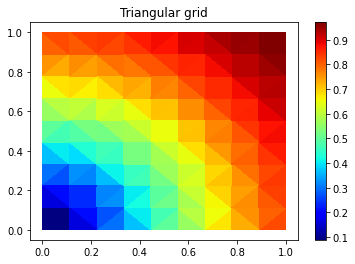

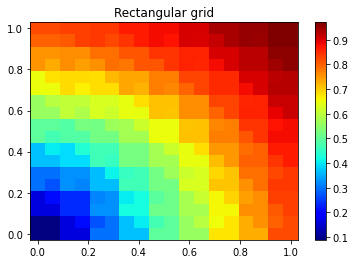

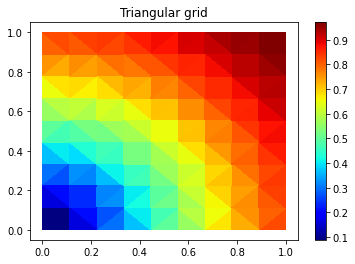

In [19]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Define the regular triangular grid
nxr, nyr = (10, 10)
x, y = np.meshgrid(np.linspace(0, 1, nxr), np.linspace(0, 1, nyr))
x, y = x.flatten(), y.flatten()
z = np.sin(np.sqrt(x**2 + y**2))
points = np.vstack((x, y, z)).T
tri = Delaunay(points[:, :2])

# Define the regular rectangular grid
nxx, nyy = (18, 18)
xx, yy = np.meshgrid(np.linspace(0, 1, nxx), np.linspace(0, 1, nyy))
points_regular = np.vstack((xx.flatten(), yy.flatten())).T

# Convert to rectangular grid using Delaunay triangulation
# this line tells u which  which triangle each point in the rectangular grid
# is located in using the find_simplex() method of the tri object.
#the average of the z values of the three vertices of the triangle is calculated using the average()
tri_indices = tri.find_simplex(points_regular)
values_regular = np.zeros(nxx*nyy)
for i in range(nxx*nyy):
    if tri_indices[i] != -1:
        values_regular[i] = np.average(points[tri.simplices[tri_indices[i]]][:,2])
    else:
        values_regular[i] = np.nan

# Plot the result
plt.tripcolor(points[:,0], points[:,1], tri.simplices, points[:,2], cmap='jet')
plt.colorbar()
plt.title('Triangular grid')
plt.show()

plt.pcolormesh(xx, yy, values_regular.reshape(nyy, nxx), cmap='jet')
plt.colorbar()
plt.title('Rectangular grid')
plt.show()

# Convert back to triangular grid using Delaunay triangulation
tri_indices = tri.find_simplex(points_regular)
values_triangular = np.zeros(nxx*nyy)
for i in range(nxx*nyy):
    if tri_indices[i] != -1:
        values_triangular[i] = np.average(points[tri.simplices[tri_indices[i]], 2])
    else:
        values_triangular[i] = np.nan

# Plot the result
plt.tripcolor(points[:,0], points[:,1], tri.simplices, points[:,2], cmap='jet')
plt.colorbar()
plt.title('Triangular grid')
plt.show()


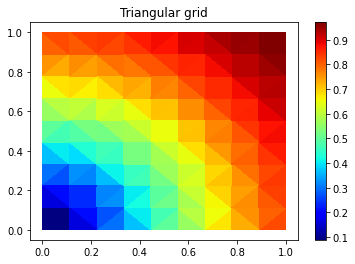

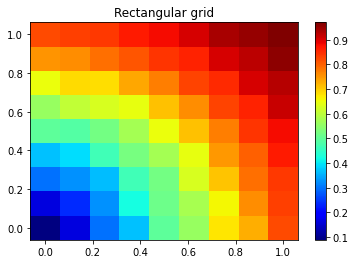

/tmp/ipykernel_9264/228416841.py:48: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  values_new[i] = (values_regular[np.where((points == a).all(axis=1))[0][0]] +


AttributeError: 'bool' object has no attribute 'all'

In [15]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Define the regular triangular grid
nxr, nyr = (10, 10)
x, y = np.meshgrid(np.linspace(0, 1, nxr), np.linspace(0, 1, nyr))
x, y = x.flatten(), y.flatten()
z = np.sin(np.sqrt(x**2 + y**2))
points = np.vstack((x, y, z)).T
tri = Delaunay(points[:, :2])

# Define the regular rectangular grid
nxx, nyy = (9, 9)
xx, yy = np.meshgrid(np.linspace(0, 1, nxx), np.linspace(0, 1, nyy))
points_regular = np.vstack((xx.flatten(), yy.flatten())).T

# Convert to rectangular grid using Delaunay triangulation
# this line tells u which  which triangle each point in the rectangular grid
# is located in using the find_simplex() method of the tri object.
#the average of the z values of the three vertices of the triangle is calculated using the average()
tri_indices = tri.find_simplex(points_regular)
values_regular = np.zeros(nxx*nyy)
for i in range(nxx*nyy):
    if tri_indices[i] != -1:
        values_regular[i] = np.average(points[tri.simplices[tri_indices[i]]][:,2])
    else:
        values_regular[i] = np.nan

# Plot the result
plt.tripcolor(points[:,0], points[:,1], tri.simplices, points[:,2], cmap='jet')
plt.colorbar()
plt.title('Triangular grid')
plt.show()

plt.pcolormesh(xx, yy, values_regular.reshape(nyy, nxx), cmap='jet')
plt.colorbar()
plt.title('Rectangular grid')
plt.show()

# Convert back to triangular grid using Delaunay triangulation
tri_new = Delaunay(points_regular)
values_new = np.zeros(nxx*nyy)
for i in range(tri_new.npoints):
    simplex = tri_new.simplices[tri_new.find_simplex(points_regular[i])]
    a, b, c = points_regular[simplex]
    values_new[i] = (values_regular[np.where((points == a).all(axis=1))[0][0]] +
                     values_regular[np.where((points == b).all(axis=1))[0][0]] +
                     values_regular[np.where((points == c).all(axis=1))[0][0]]) / 3.0
    if np.isnan(values_new[i]):
        values_new[i] = griddata(points[:, :2], points[:, 2], (points_regular[i, 0], points_regular[i, 1]), method='cubic')

# Plot the result
plt.tricontourf(points_regular[:,0], points_regular[:,1], tri_new.simplices, values_new, cmap='jet')
plt.colorbar()
plt.title('Triangular grid (reconstructed)')
plt.show()
